# 🎭 Análise de sentimentos utilizando o classificador Naive Bayes

## 📚 Importação das bibliotecas

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\gabri\AppData\Local\Temp\ipykernel_23764\3082362793.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## ⌛ Carregamento e limpeza dos dados
1. Leitura do arquivo csv.

In [2]:
df_reviews = pd.read_csv('B2W-Reviews01.csv')
df_reviews

C:\Users\gabri\AppData\Local\Temp\ipykernel_23764\4230985551.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('B2W-Reviews01.csv')


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,NaN,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,NaN,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,NaN,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


2. Remove linhas sem texto da coluna **review_test**.

In [3]:
df_reviews = df_reviews.dropna(subset=['review_text'])

3. Quantifica o total de números de avaliações para possuir uma classificação mais democrática e não enviesar os resultados.

In [4]:
df_reviews['overall_rating'].value_counts()

overall_rating
5    47329
4    31987
1    25646
3    16010
2     8126
Name: count, dtype: int64

4. Classifica a coluna **rating** por meio de sua nota de avaliação, para avaliações superiores a 3, a linha recebe *1*, caso contrário a linha recebe *0*.

In [5]:
df_reviews['rating'] = df_reviews['overall_rating'].apply(lambda x: 1 if x > 3 else 0)

C:\Users\gabri\AppData\Local\Temp\ipykernel_23764\816953379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['rating'] = df_reviews['overall_rating'].apply(lambda x: 1 if x > 3 else 0)


5. Verifica a quantidade de **rating** com valores *1* e *0*.

In [6]:
df_reviews[['rating']].value_counts()

rating
1         79316
0         49782
Name: count, dtype: int64

6. Define as variáveis de entrada e saída.

In [7]:
X = df_reviews['review_text']
y = df_reviews['rating']

## 📑 Pré-processamento de texto
1. Função para adicionar o prefixo "NAO__" após certas palavras negativas pausando nas pontuações.

In [8]:
def add_negation_prefix(text):
    tokens = re.findall(r'(?u)\b\w+\b|[^\w\s]', text)
    negations = {"não", "nem", "nunca", "jamais", "tampouco"}
    punctuation = {".", ",", "?", "!", ";"}

    new_tokens = []
    negate = False

    for token in tokens:
        if token in punctuation:
            new_tokens.append(token)
            negate = False
        elif token.lower() in negations:
            new_tokens.append(token)
            negate = True
        elif negate:
            new_tokens.append(f"NAO__{token}")
        else:
            new_tokens.append(token)
    return " ".join(new_tokens)

2. Realiza a divisão dos dados para **treinamento** e **teste**. 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

3. Aplica o pré-processamento para os dados advindos da adição do prefixo "NAO__".

In [10]:
X_train_neg = X_train.apply(add_negation_prefix)
X_test_neg = X_test.apply(add_negation_prefix)

## 🔗 Vetorização
1. Vetoriza esses dados *COM* acréscimo negativo.

In [11]:
vectorizer_neg = TfidfVectorizer()

X_train_vec_neg = vectorizer_neg.fit_transform(X_train_neg)
X_test_vec_neg = vectorizer_neg.transform(X_test_neg)

2. Vetoriza os dados *SEM* o acréscimo negativo.

In [12]:
vectorizer_normal = TfidfVectorizer()

X_train_vec_normal = vectorizer_normal.fit_transform(X_train)
X_test_vec_normal = vectorizer_normal.transform(X_test)

## ⛏️ Modelagem e avaliação
1. Treina o modelo **Naive Bayes** para a abordagem de dados *COM* negação obtendo o valor da acurácia.

In [13]:
model_neg = MultinomialNB()
model_neg.fit(X_train_vec_neg, y_train)

y_pred_neg = model_neg.predict(X_test_vec_neg)

acc_neg = accuracy_score(y_test, y_pred_neg)
print(f'Acurácia com NAO__: {acc_neg:.4f}')

Acurácia com NAO__: 0.8534


2. Treina o modelo **Naive Bayes** para a abordagem de dados *SEM* negação obtendo o valor da acurácia.

In [14]:
model_normal = MultinomialNB()
model_normal.fit(X_train_vec_normal, y_train)

y_pred_normal = model_normal.predict(X_test_vec_normal)

acc_normal = accuracy_score(y_test, y_pred_normal)
print(f'Acurácia sem NAO__: {acc_normal:.4f}')

Acurácia sem NAO__: 0.8550


3. Plot para melhor visualização de comparação das acurácias.

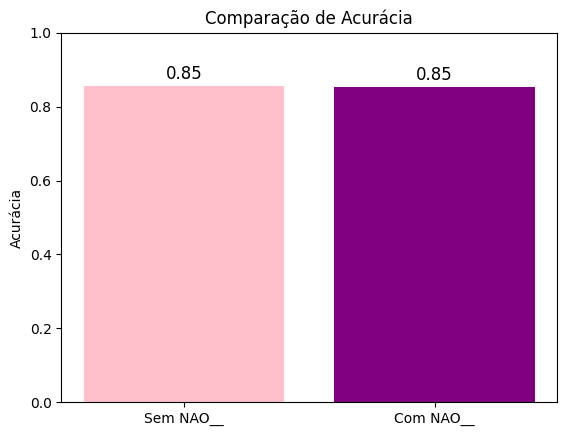

In [15]:
fig, ax = plt.subplots()
ax.bar(['Sem NAO__', 'Com NAO__'], [acc_normal, acc_neg], color=['pink', 'purple'])
ax.set_title('Comparação de Acurácia')
ax.set_ylabel('Acurácia')
ax.set_ylim(0, 1)

for i, v in enumerate([acc_normal, acc_neg]):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()